In [10]:
# import relevant modules
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import csv
import datetime
import os
from netCDF4 import Dataset

In [3]:


# define the path to the data
DataDir_SEV = 'C:/Users/krthk/Downloads/ARSI/SEVIRI/*.nc'
dataDir_insitu = 'C:/Users/krthk/Downloads/ARSI/insitu/GT_MDB_IS_INSIT_GBB_W-20200101_0000XX-KKIT-0.00X0.00-V.1.0.nc'
# open the data
#data_SEV = xr.open_mfdataset(DataDir_SEV, combine='nested', concat_dim='time')



In [5]:
insitu_data = xr.open_dataset(dataDir_insitu, engine='netcdf4')

In [6]:
lst_insitu_val = insitu_data.variables['LST']
lst_insitu_val = np.array(lst_insitu_val)

In [7]:
lst_insitu_val.shape

(527036,)

In [8]:
lst_insitu_val

array([291.61   , 291.59   , 291.53   , ..., 290.25998, 290.24   ,
       290.25   ], dtype=float32)

LST1_sv = np.array(LST_sv[:,0,0])
#LST1_in = np.array(LST_in[:,0,0])

LST1_sv


fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111)
ax.plot(time_sv, LST1_sv)

In [11]:
# prepare insitu data
#lst_insitu_val = insitu_data.variables['LST']
#lst_insitu_val = np.array(lst_insitu_val)


def julian_to_gregorian(julian_dates):
    # Add the offset between Julian and Gregorian calendar
    gregorian_offset = 2400000.5
    # Calculate the number of days and fractions of a day
    days = julian_dates - gregorian_offset
    # Calculate the datetime components
    hours = (days * 24) % 24
    minutes = (hours * 60) % 60
    seconds = (minutes * 60) % 60
    # Convert days to datetime objects
    dates = np.vectorize(datetime.datetime.fromordinal)(np.floor(days).astype(int) + datetime.datetime(1858, 11, 17).toordinal())
    # Extract Gregorian dates and times
    time = [date.date() for date in dates]
    gregorian_times = [datetime.time(h, m, s) for h, m, s in zip(hours.astype(int), minutes.astype(int), seconds.astype(int))]
    return time, gregorian_times

# Load the NetCDF file
dataset = Dataset(r'C:/Users/krthk/Downloads/ARSI/insitu/GT_MDB_IS_INSIT_GBB_W-20200101_0000XX-KKIT-0.00X0.00-V.1.0.nc')


# Read the Julian date variable from the NetCDF file
julian_date_variable = dataset.variables['jul_date'][:600000]  # Select the first 1000 dates

# Convert Julian dates to Gregorian dates
time, gregorian_times = julian_to_gregorian(julian_date_variable)

# Prepare the data for CSV writing
data = list(zip(time, gregorian_times))

# Specify the directory to save the CSV file
output_directory = 'C:/Users/krthk/Downloads/ARSI/'

# Ensure the output directory exists, create it if necessary
os.makedirs(output_directory, exist_ok=True)

# Specify the CSV file path
csv_file = os.path.join(output_directory, 'GBB_time_Gregorian_new.csv')

# Write data to the CSV file
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['time', 'Gregorian_Time'])  # Write header
    writer.writerows(data)  # Write data rows

print("Data saved to CSV file:",csv_file)

Data saved to CSV file: C:/Users/krthk/Downloads/ARSI/GBB_time_Gregorian_new.csv


In [12]:
df_in = pd.read_csv('C:/Users/krthk/Downloads/ARSI/GBB_time_Gregorian_new.csv')
df_in = pd.DataFrame(df_in)

In [13]:
df_in.head()

,time,Gregorian_Time
0,2020-01-01,00:00:00
1,2020-01-01,00:00:59
2,2020-01-01,00:02:00
3,2020-01-01,00:02:59
4,2020-01-01,00:04:00


In [14]:
# save arr to a CSV file using numpy.savetxt()
np.savetxt('lst_insitu_val.csv', lst_insitu_val, delimiter=',')

In [15]:
df_in1 = pd.read_csv('C:/Users/krthk/Downloads/ARSI/lst_insitu_val.csv')
df_in1.columns =['lst_insitu']

In [16]:
df_in1.head()

,lst_insitu
0,291.589996
1,291.529999
2,291.570007
3,291.539978
4,291.500000


In [17]:
df_insitu = pd.concat([df_in,df_in1], axis=1, ignore_index=False)

In [18]:
print(df_insitu)

              time Gregorian_Time  lst_insitu
0       2020-01-01       00:00:00  291.589996
1       2020-01-01       00:00:59  291.529999
2       2020-01-01       00:02:00  291.570007
3       2020-01-01       00:02:59  291.539978
4       2020-01-01       00:04:00  291.500000
...            ...            ...         ...
527031  2020-12-31       23:55:00  290.220001
527032  2020-12-31       23:55:59  290.259979
527033  2020-12-31       23:57:00  290.239990
527034  2020-12-31       23:57:59  290.250000
527035  2020-12-31       23:59:00         NaN

[527036 rows x 3 columns]


In [19]:
lst_date = df_insitu.groupby("time")["lst_insitu"].mean()
lst_date.head(20)

time
2020-01-01    302.453410
2020-01-02    302.325135
2020-01-03    303.062320
2020-01-04    301.542993
2020-01-05    299.983778
2020-01-06    300.269337
2020-01-07    298.490426
2020-01-08    299.565685
2020-01-09    299.986929
2020-01-10    299.804776
2020-01-11    298.923205
2020-01-12    300.832109
2020-01-13    302.554993
2020-01-14    305.208321
2020-01-15    304.416547
2020-01-16    303.418447
2020-01-17    302.292726
2020-01-18    299.723648
2020-01-19    297.448504
2020-01-20    298.831190
Name: lst_insitu, dtype: float64

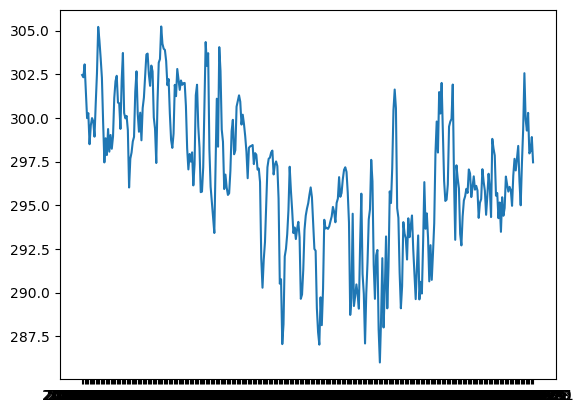

In [20]:
plt.plot(lst_date)
plt.show()

fig = plt.figure(figsize=(50, 12))
ax = fig.add_subplot(111)
plt.show()
ax.plot(lst_date)

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111)
#ax.set_xlabel('month of the year 2020')
#ax.set_title('LST insitu values')
#ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
#ax.set_xticklabels(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])
#ax.set_yticks([-1,0,1])
plt.show()
ax.plot(lst_date)

In [25]:
#open the data
data_SEV = xr.open_mfdataset(DataDir_SEV, combine='nested', concat_dim='time')

In [26]:
data_SEV

<xarray.Dataset>
Dimensions:          (time: 8255, nj: 11, ni: 11)
Coordinates:
  * time             (time) datetime64[ns] 2020-01-01 ... 2020-12-31T23:00:16
    lat              (nj, ni) float32 dask.array<chunksize=(11, 11), meta=np.ndarray>
    lon              (nj, ni) float32 dask.array<chunksize=(11, 11), meta=np.ndarray>
Dimensions without coordinates: nj, ni
Data variables:
    dtime            (time, nj, ni) timedelta64[ns] dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    satze            (time, nj, ni) float32 dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    sataz            (time, nj, ni) float32 dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    solze            (time, nj, ni) float32 dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    solaz            (time, nj, ni) float32 dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    qual_flag        (time, nj, ni) float32 dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    lst              (time, nj, ni) float32 dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
    lst_uncertainty  (time, nj, ni) float32 dask.array<chunksize=(1, 11, 11), meta=np.ndarray>
Attributes: (12/42)
    title:                      ESA LST CCI land surface temperature level DS...
    institution:                University of Leicester
    source:                     SEVIRI-EUMETSAT-L1-v1.0, ERA5-ECMWF-REA-c41r2...
    history:                    Created using software developed at Universit...
    references:                 http://cci.esa.int/lst
    tracking_id:                dummy000-uuid-0000-0000-000000000000
    ...                         ...
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.05
    geospatial_lat_resolution:  0.05
    key_variables:              land_surface_temperature
    svn_version:                5615
    format_version:             CCI Data Standards v2.1

In [27]:
LST_sv = data_SEV['lst'].values
time_sv = data_SEV['time'].values

In [29]:
#LST_sv = np.array(LST_sv)
LST_sv.shape


(8255, 11, 11)

In [30]:
lst_seviri=LST_sv[:,0,0]
lst_seviri

array([   nan,    nan, 280.03, ...,    nan,    nan,    nan], dtype=float32)

In [31]:
print(time_sv)

['2020-01-01T00:00:00.000000000' '2020-01-01T00:59:44.000000000'
 '2020-01-01T01:59:28.000000000' ... '2020-12-31T21:00:48.000000000'
 '2020-12-31T22:00:32.000000000' '2020-12-31T23:00:16.000000000']


fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
plt.show()
ax.plot(time_sv, lst_seviri)

In [32]:
# save arr to a CSV file using numpy.savetxt()
np.savetxt('lst_seviri.csv', lst_seviri, delimiter=',')
np.savetxt('time_sv.csv', time_sv, delimiter=',')



In [33]:
df_sev1 = pd.read_csv('C:/Users/krthk/Downloads/ARSI/time_sv.csv')
df_sev1.columns =['time_sv']

df_sev2 = pd.read_csv('C:/Users/krthk/Downloads/ARSI/lst_seviri.csv')
df_sev2.columns =['lst_seviri']

In [34]:
# Convert the timestamp_column to datetime format and then to yyyy-mm-dd format
df_sev1['time_sv'] = pd.to_datetime(df_sev1['time_sv']).dt.strftime('%Y-%m-%d')

df_sev11 = df_sev1.rename(columns={"time_sv": "time"})

df_sev11.head()

,time
0,2020-01-01
1,2020-01-01
2,2020-01-01
3,2020-01-01
4,2020-01-01


In [35]:
df_sev2.head()

,lst_seviri
0,NaN
1,280.029999
2,289.720001
3,287.649994
4,NaN


In [36]:
df_seviri = pd.concat([df_sev11,df_sev2], axis=1, ignore_index=False)

lst_sev = df_seviri.groupby("time")["lst_seviri"].mean()
lst_sev.head(20)

time
2020-01-01    309.831430
2020-01-02    307.199998
2020-01-03    309.497270
2020-01-04    307.693913
2020-01-05    302.445329
2020-01-06    303.185259
2020-01-07    303.878261
2020-01-08    304.087726
2020-01-09    305.269168
2020-01-10    305.325646
2020-01-11    304.619995
2020-01-12    306.825451
2020-01-13    286.906667
2020-01-27    313.688666
2020-01-28    306.950411
2020-01-29    306.512914
2020-01-30    304.124763
2020-01-31    305.266362
2020-02-01    305.234443
2020-02-02    305.540907
Name: lst_seviri, dtype: float64

In [37]:
#df_sev = pd.DataFrame(lst_sev)

#df_sev.rename(columns={"time_sv": "time_sev", "lst_seviri": "lst_sev"})
#df_sev.columns =['time_sv', 'lst_seviri']
#df_sev['lst_seviri']
#df_sev

#os.makedirs('C:/Users/krthk/Downloads/ARSI/', exist_ok=True)  
#df_sev.to_csv('C:/Users/krthk/Downloads/ARSI/df_sev.csv')  


In [38]:

# Convert the timestamp column to datetime format
#df_sev['time_sv'] = pd.to_datetime(df_sev['time_sv'])

# Set the timestamp column as the index
#df_sev.set_index('time_sv', inplace=True)

# Plot the time series
plt.figure(figsize=(50, 6))
plt.plot(df_sev.index, df_sev['lst_seviri'], marker='o')
plt.xlabel('Timestamp')
plt.ylabel('lst Value')
plt.title('Time Series Plot')
plt.grid(True)
plt.show()


NameError: name 'df_sev' is not defined

<Figure size 5000x600 with 0 Axes>

In [39]:
df_ins = pd.DataFrame(lst_date)
df_ins.head(30)

,lst_insitu
time,
2020-01-01,302.453410
2020-01-02,302.325135
2020-01-03,303.062320
2020-01-04,301.542993
2020-01-05,299.983778
2020-01-06,300.269337
2020-01-07,298.490426
2020-01-08,299.565685
2020-01-09,299.986929


In [40]:
df_sev = pd.DataFrame(lst_sev)
df_sev.head(30)

,lst_seviri
time,
2020-01-01,309.831430
2020-01-02,307.199998
2020-01-03,309.497270
2020-01-04,307.693913
2020-01-05,302.445329
2020-01-06,303.185259
2020-01-07,303.878261
2020-01-08,304.087726
2020-01-09,305.269168


In [41]:
#df_final = pd.merge(df_sev, df_ins)

df_final = df_ins.merge(df_sev, on = 'time')
df_final.head(30)

,lst_insitu,lst_seviri
time,,
2020-01-01,302.453410,309.831430
2020-01-02,302.325135,307.199998
2020-01-03,303.062320,309.497270
2020-01-04,301.542993,307.693913
2020-01-05,299.983778,302.445329
2020-01-06,300.269337,303.185259
2020-01-07,298.490426,303.878261
2020-01-08,299.565685,304.087726
2020-01-09,299.986929,305.269168


In [77]:
df_final.to_csv('C:/Users/krthk/Downloads/ARSI/df_final.csv')

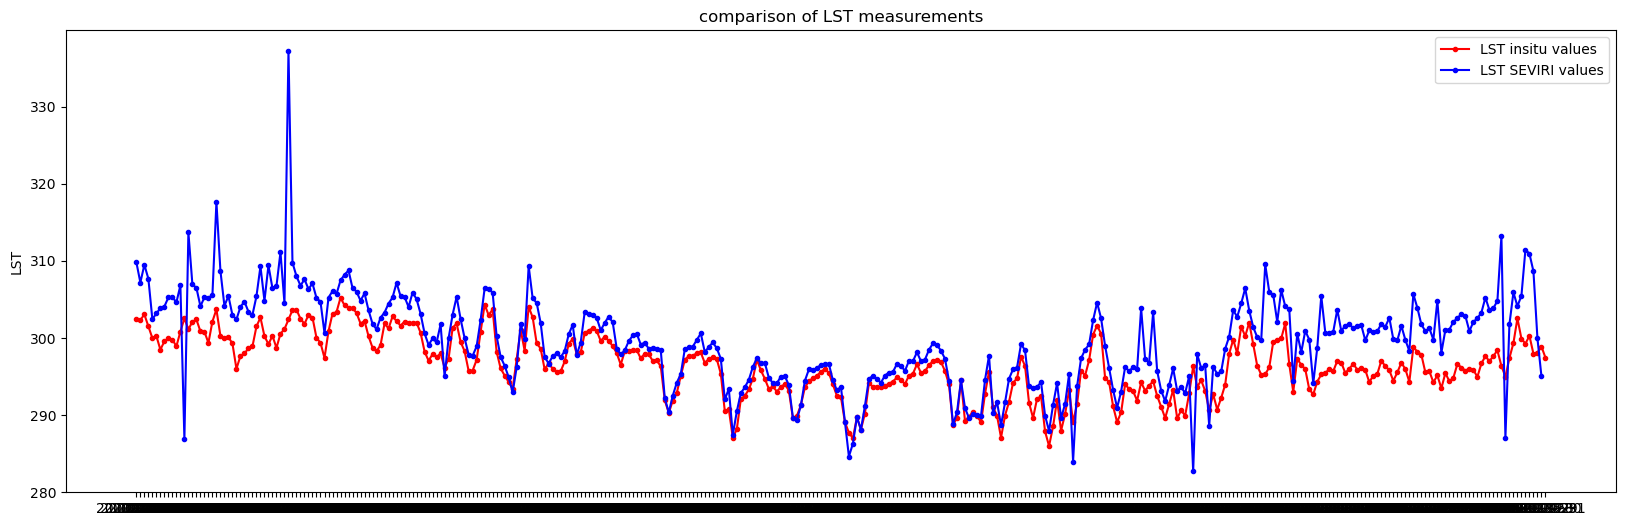

In [42]:
#total
plt.figure(figsize=(20, 6))
plt.plot(df_final.index,df_final.lst_insitu, 'r.-', label="LST insitu values")
plt.plot(df_final.index,df_final.lst_seviri, 'b.-', label="LST SEVIRI values")


plt.title('comparison of LST measurements')
plt.ylabel('LST')
plt.xticks(df_final.index)
#plt.xlim(0,17)

plt.legend()
plt.show()

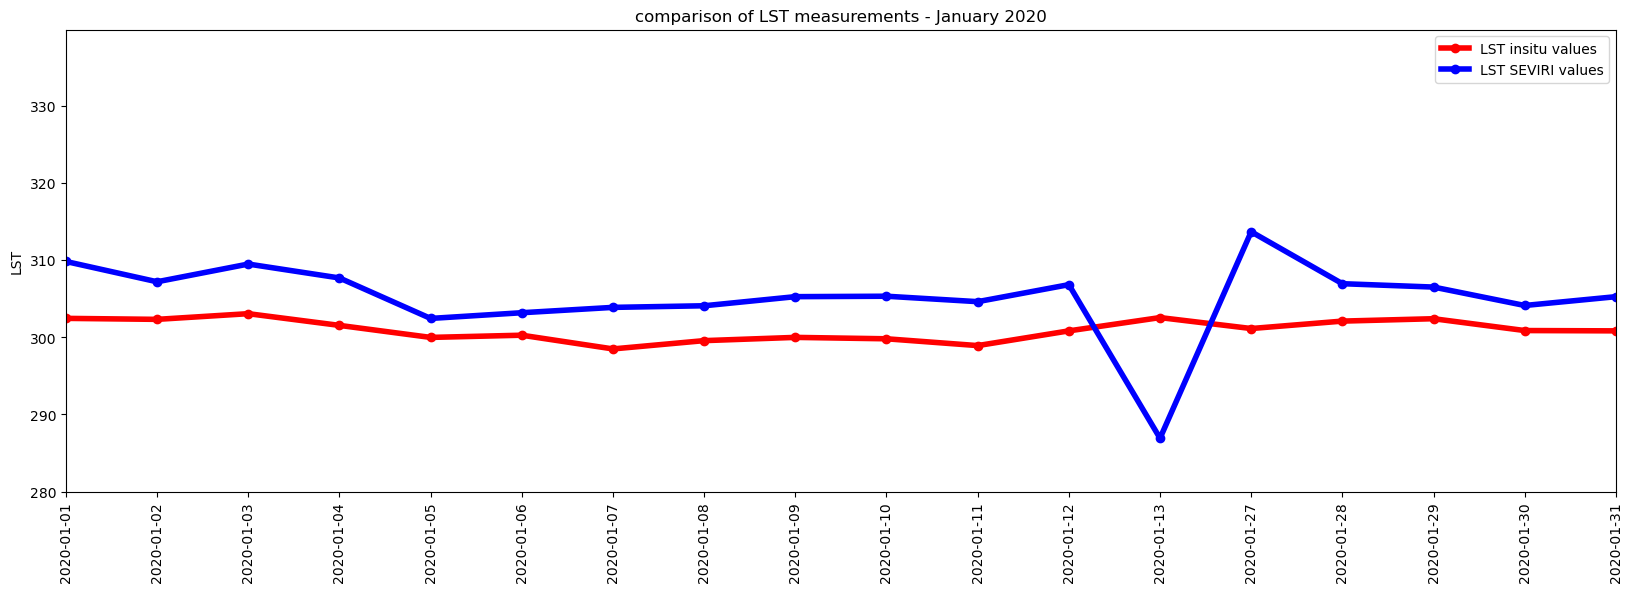

In [65]:
#January

plt.figure(figsize=(20, 6))
plt.plot(df_final.index,df_final.lst_insitu, 'ro-', label="LST insitu values", linewidth = '4')
plt.plot(df_final.index,df_final.lst_seviri, 'bo-', label="LST SEVIRI values", linewidth = '4')


plt.title('comparison of LST measurements - January 2020')
plt.ylabel('LST')
plt.xticks(df_final.index, rotation='vertical')
plt.xlim(0,17)

plt.legend()
plt.show()

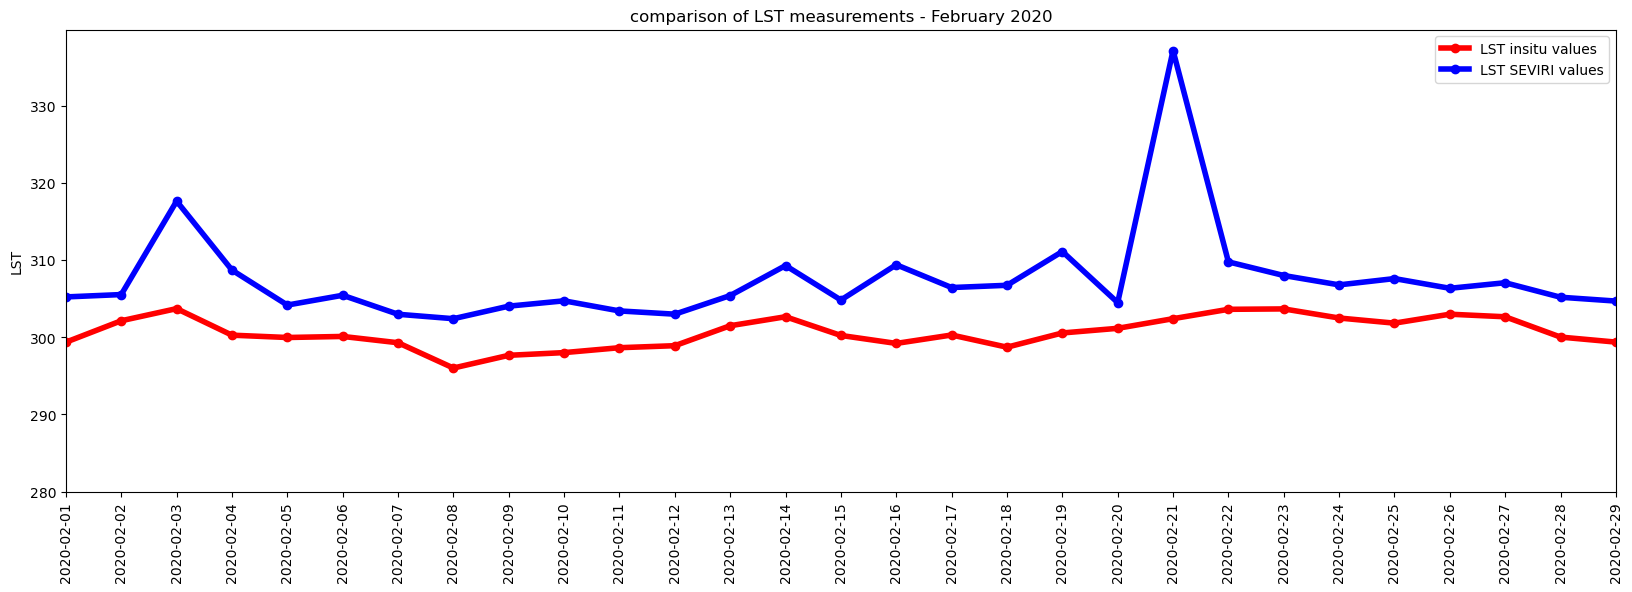

In [66]:
#Feb

plt.figure(figsize=(20, 6))
plt.plot(df_final.index,df_final.lst_insitu, 'ro-', label="LST insitu values", linewidth = '4')
plt.plot(df_final.index,df_final.lst_seviri, 'bo-', label="LST SEVIRI values", linewidth = '4')


plt.title('comparison of LST measurements - February 2020')
plt.ylabel('LST')
plt.xticks(df_final.index, rotation='vertical')
plt.xlim(18,46)

plt.legend()
plt.show()

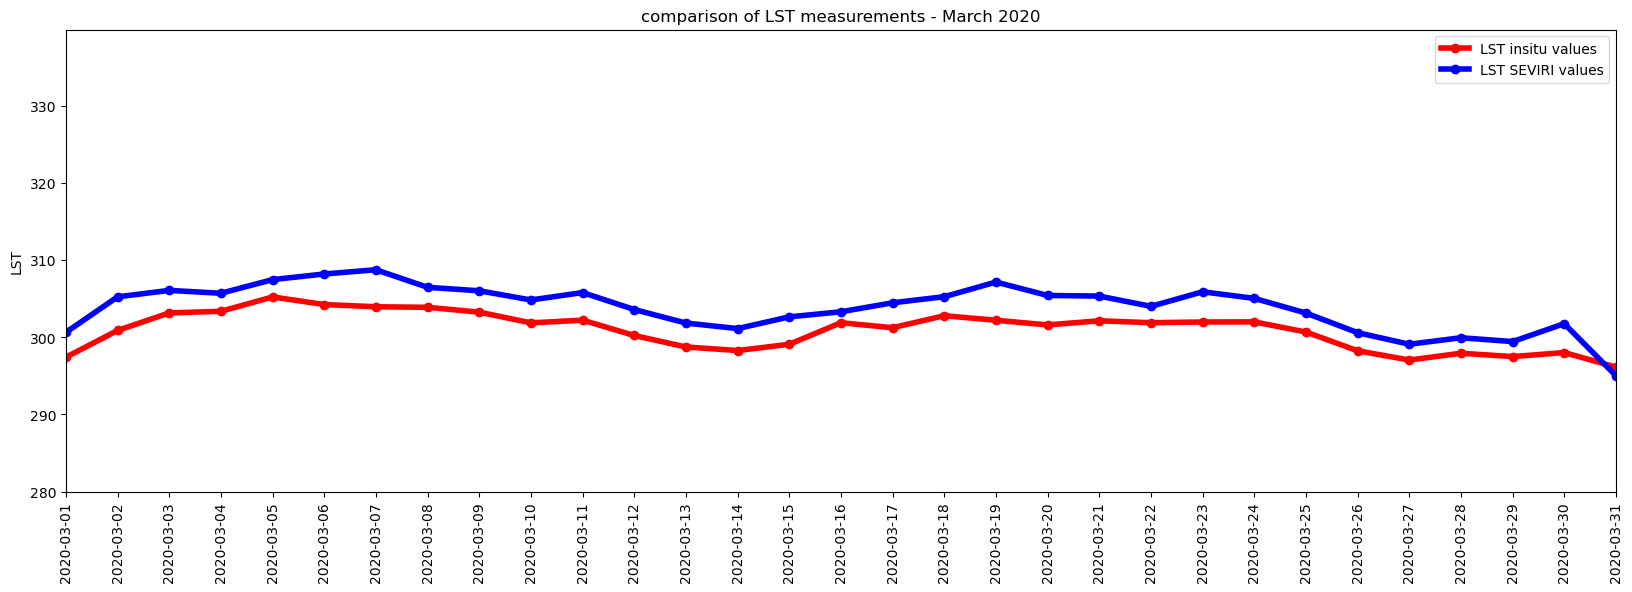

In [67]:
#Mar

plt.figure(figsize=(20, 6))
plt.plot(df_final.index,df_final.lst_insitu, 'ro-', label="LST insitu values", linewidth = '4')
plt.plot(df_final.index,df_final.lst_seviri, 'bo-', label="LST SEVIRI values", linewidth = '4')


plt.title('comparison of LST measurements - March 2020')
plt.ylabel('LST')
plt.xticks(df_final.index, rotation='vertical')
plt.xlim(47,77)

plt.legend()
plt.show()

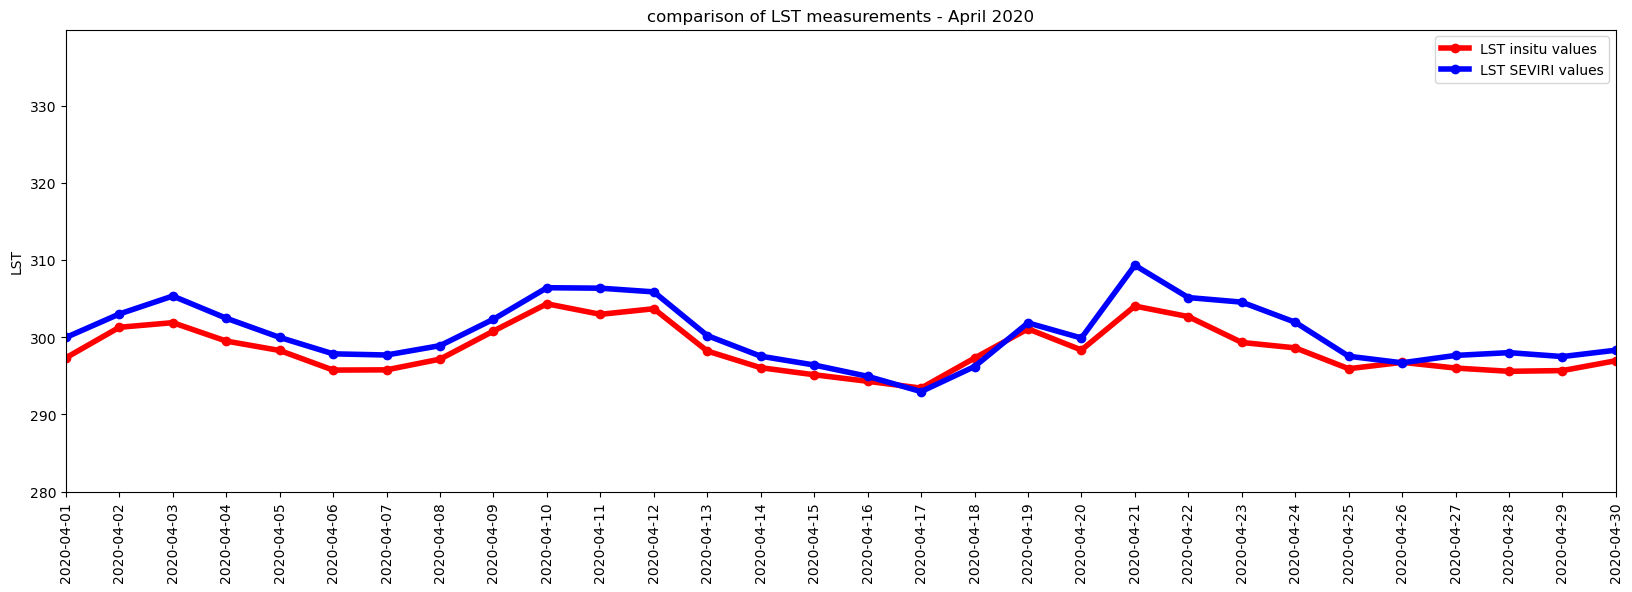

In [68]:
#Apr

plt.figure(figsize=(20, 6))
plt.plot(df_final.index,df_final.lst_insitu, 'ro-', label="LST insitu values", linewidth = '4')
plt.plot(df_final.index,df_final.lst_seviri, 'bo-', label="LST SEVIRI values", linewidth = '4')


plt.title('comparison of LST measurements - April 2020')
plt.ylabel('LST')
plt.xticks(df_final.index, rotation='vertical')
plt.xlim(78,107)

plt.legend()
plt.show()

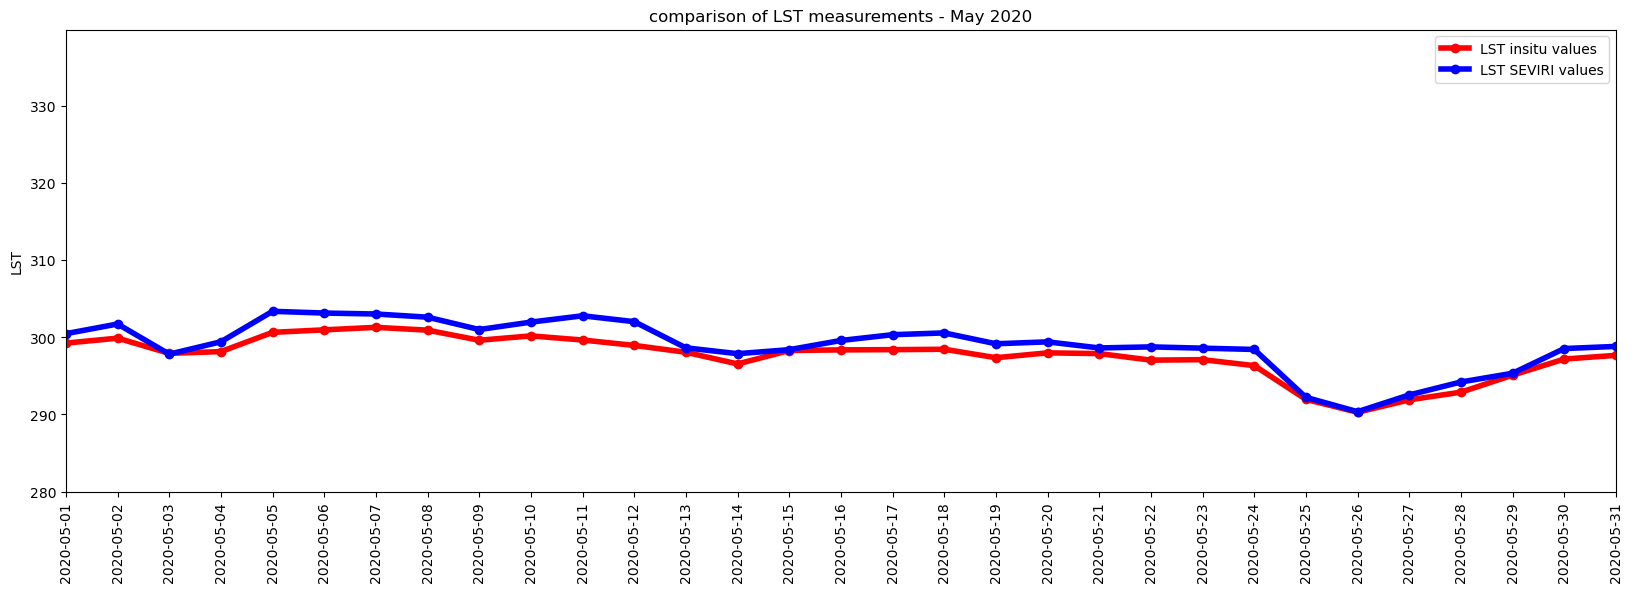

In [69]:
#may

plt.figure(figsize=(20, 6))
plt.plot(df_final.index,df_final.lst_insitu, 'ro-', label="LST insitu values", linewidth = '4')
plt.plot(df_final.index,df_final.lst_seviri, 'bo-', label="LST SEVIRI values", linewidth = '4')


plt.title('comparison of LST measurements - May 2020')
plt.ylabel('LST')
plt.xticks(df_final.index, rotation='vertical')
plt.xlim(108,138)

plt.legend()
plt.show()

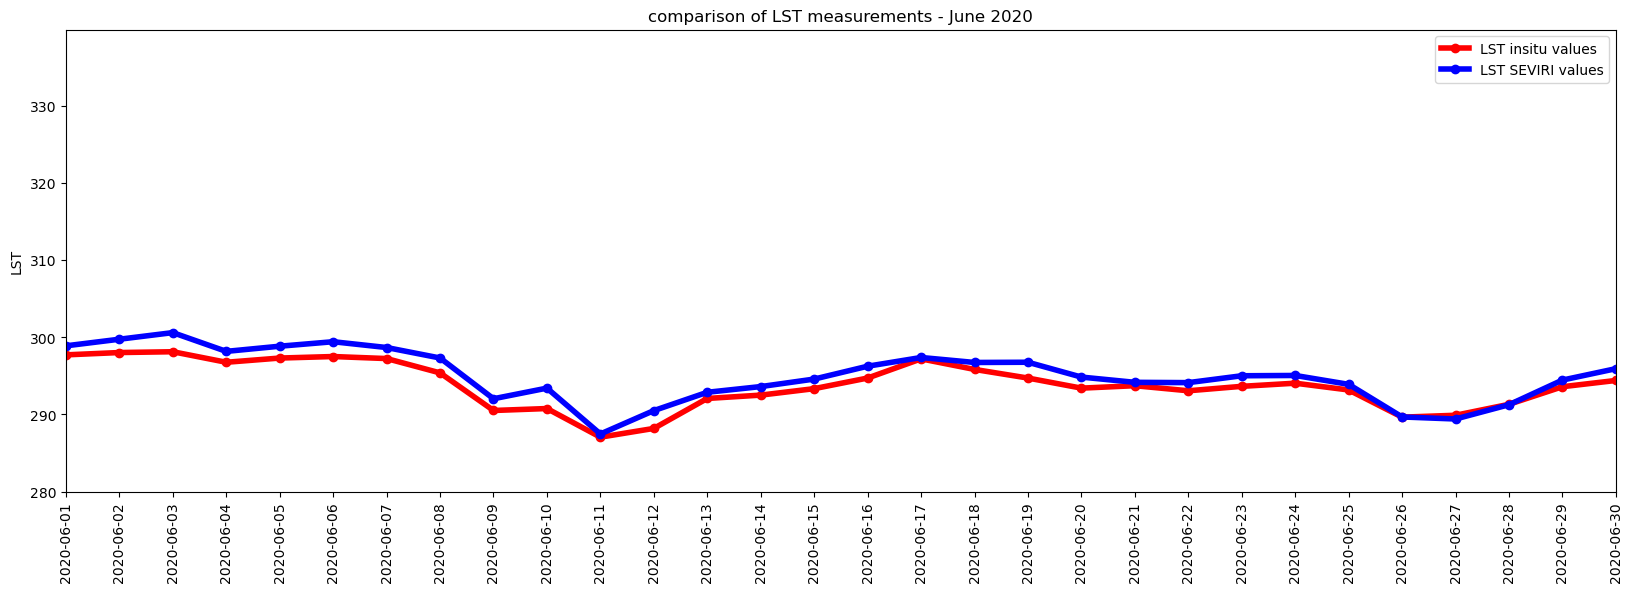

In [70]:
#Jun

plt.figure(figsize=(20, 6))
plt.plot(df_final.index,df_final.lst_insitu, 'ro-', label="LST insitu values", linewidth = '4')
plt.plot(df_final.index,df_final.lst_seviri, 'bo-', label="LST SEVIRI values", linewidth = '4')


plt.title('comparison of LST measurements - June 2020')
plt.ylabel('LST')
plt.xticks(df_final.index, rotation='vertical')
plt.xlim(139,168)

plt.legend()
plt.show()

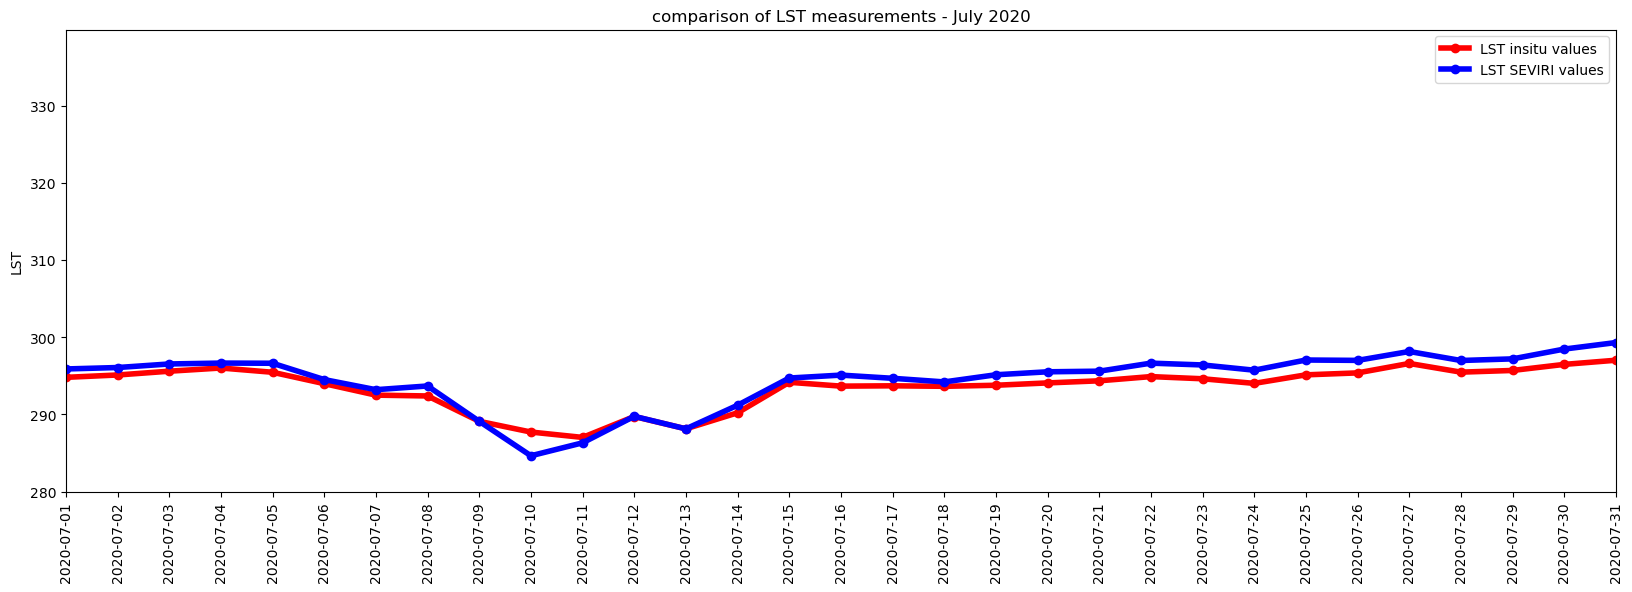

In [71]:
#Jul

plt.figure(figsize=(20, 6))
plt.plot(df_final.index,df_final.lst_insitu, 'ro-', label="LST insitu values", linewidth = '4')
plt.plot(df_final.index,df_final.lst_seviri, 'bo-', label="LST SEVIRI values", linewidth = '4')


plt.title('comparison of LST measurements - July 2020')
plt.ylabel('LST')
plt.xticks(df_final.index, rotation='vertical')
plt.xlim(169,199)

plt.legend()
plt.show()

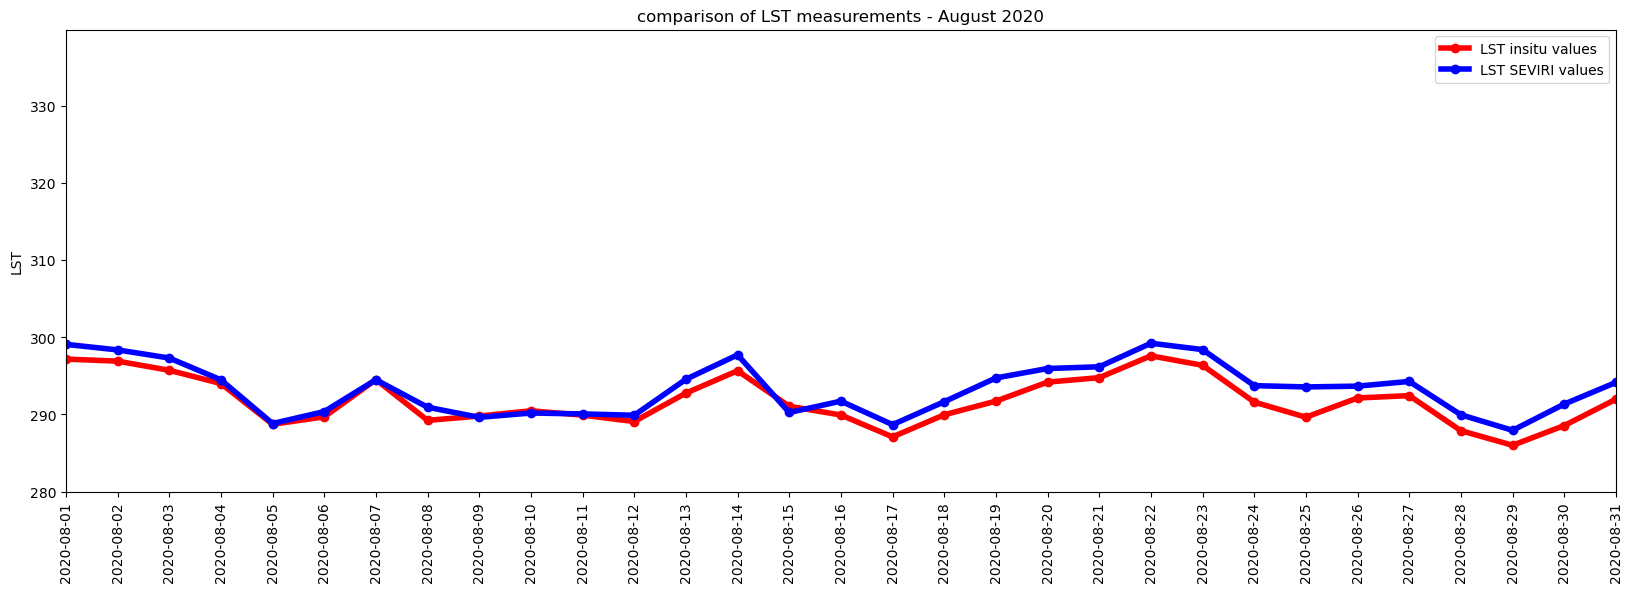

In [72]:
#Aug

plt.figure(figsize=(20, 6))
plt.plot(df_final.index,df_final.lst_insitu, 'ro-', label="LST insitu values", linewidth = '4')
plt.plot(df_final.index,df_final.lst_seviri, 'bo-', label="LST SEVIRI values", linewidth = '4')


plt.title('comparison of LST measurements - August 2020')
plt.ylabel('LST')
plt.xticks(df_final.index, rotation='vertical')
plt.xlim(200,230)

plt.legend()
plt.show()

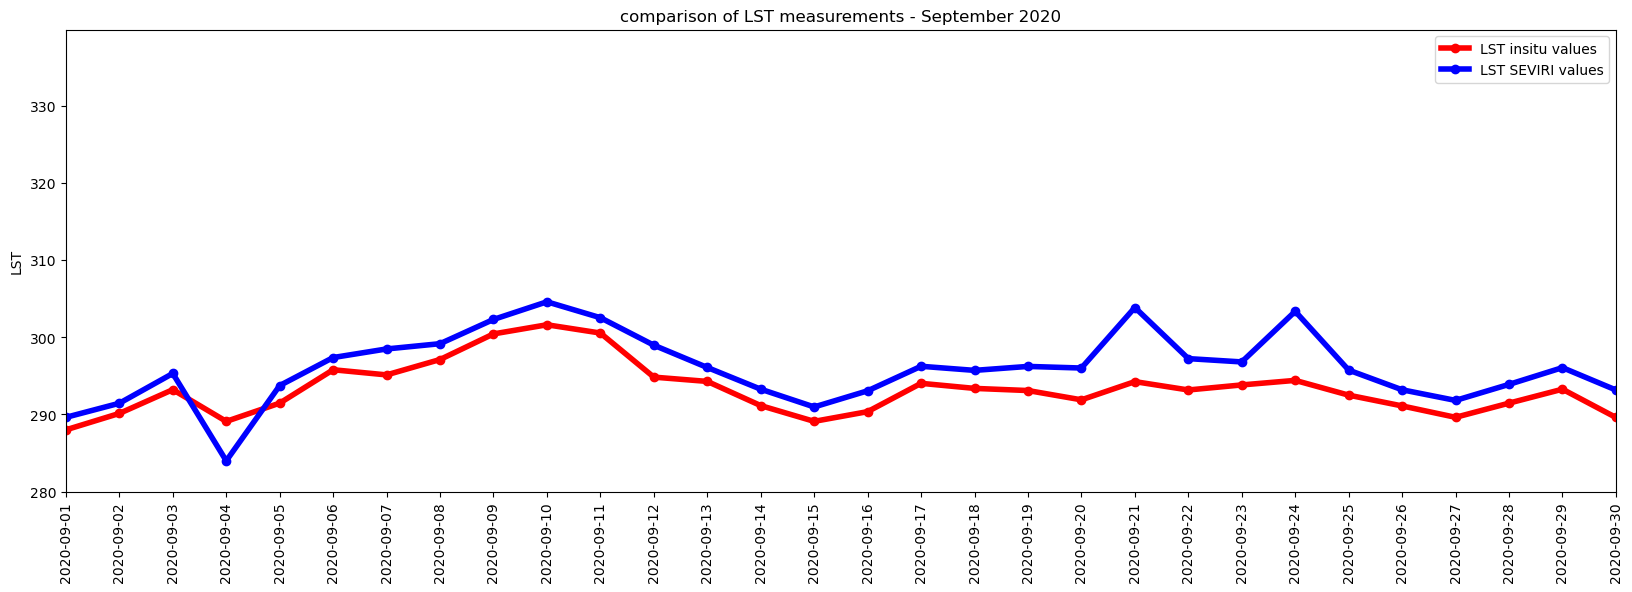

In [73]:
#Sep

plt.figure(figsize=(20, 6))
plt.plot(df_final.index,df_final.lst_insitu, 'ro-', label="LST insitu values", linewidth = '4')
plt.plot(df_final.index,df_final.lst_seviri, 'bo-', label="LST SEVIRI values", linewidth = '4')


plt.title('comparison of LST measurements - September 2020')
plt.ylabel('LST')
plt.xticks(df_final.index, rotation='vertical')
plt.xlim(231,260)

plt.legend()
plt.show()

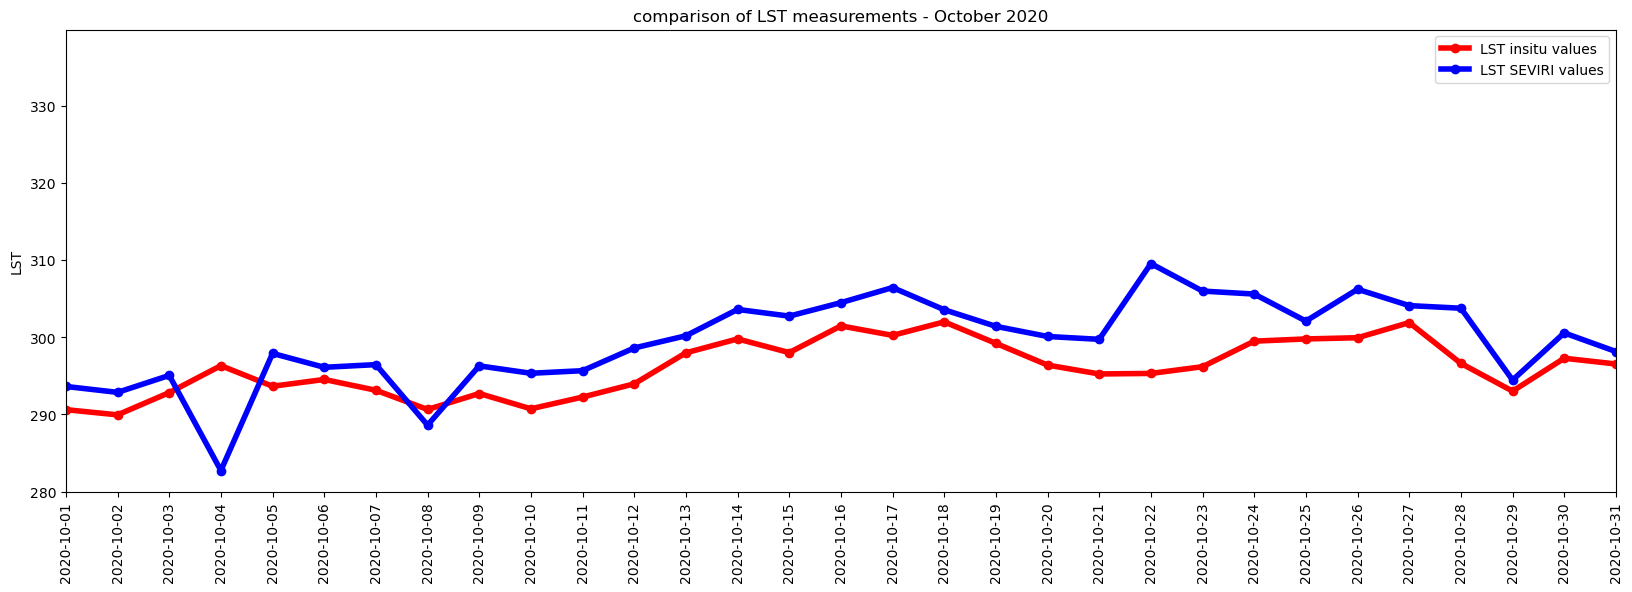

In [74]:
#oct

plt.figure(figsize=(20, 6))
plt.plot(df_final.index,df_final.lst_insitu, 'ro-', label="LST insitu values", linewidth = '4')
plt.plot(df_final.index,df_final.lst_seviri, 'bo-', label="LST SEVIRI values", linewidth = '4')


plt.title('comparison of LST measurements - October 2020')
plt.ylabel('LST')
plt.xticks(df_final.index, rotation='vertical')
plt.xlim(261,291)

plt.legend()
plt.show()

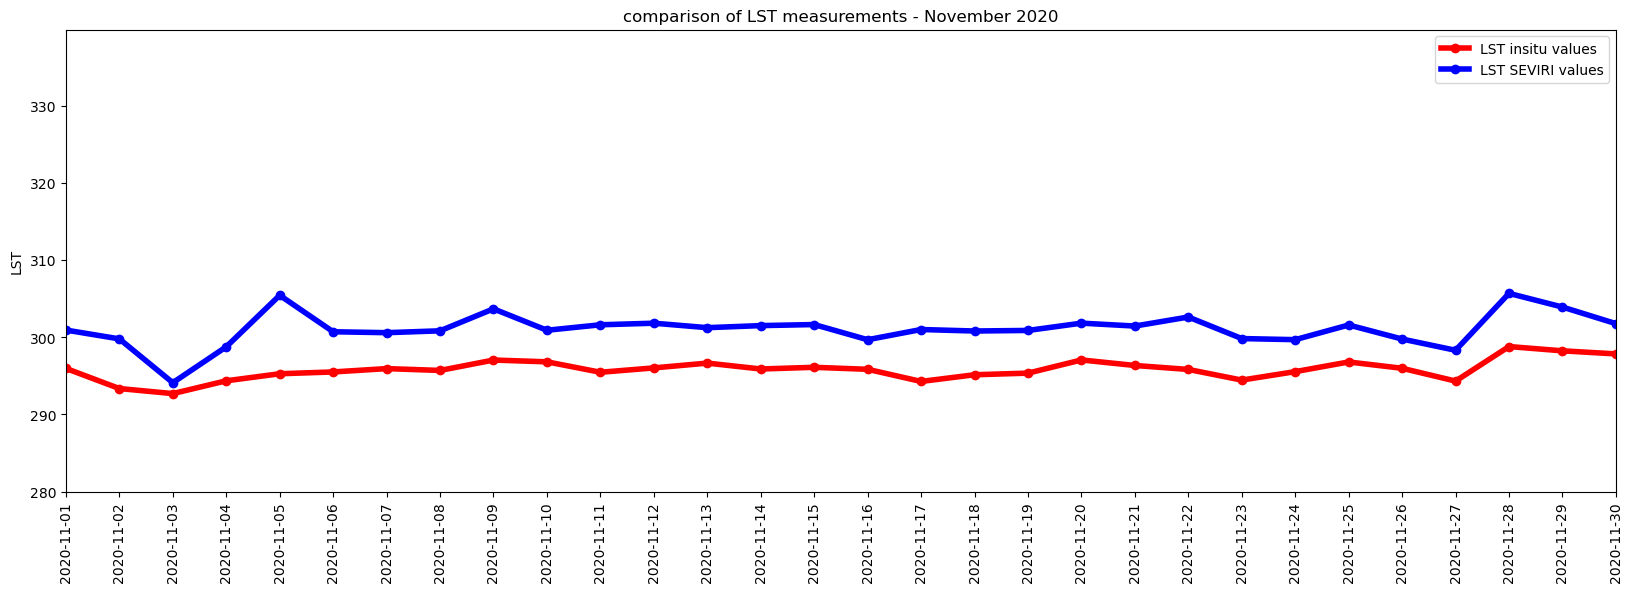

In [75]:
#Nov

plt.figure(figsize=(20, 6))
plt.plot(df_final.index,df_final.lst_insitu, 'ro-', label="LST insitu values", linewidth = '4')
plt.plot(df_final.index,df_final.lst_seviri, 'bo-', label="LST SEVIRI values", linewidth = '4')


plt.title('comparison of LST measurements - November 2020')
plt.ylabel('LST')
plt.xticks(df_final.index, rotation='vertical')
plt.xlim(292,321)

plt.legend()
plt.show()

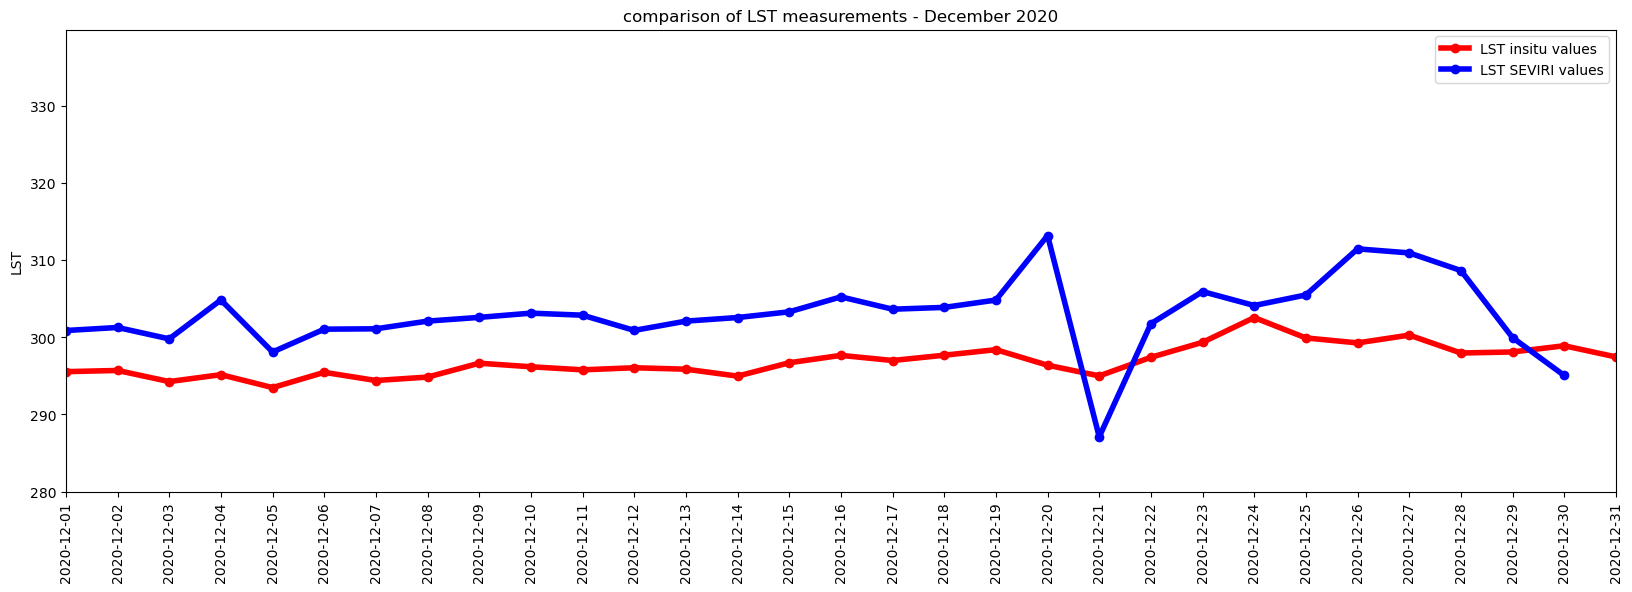

In [76]:
#Nov

plt.figure(figsize=(20, 6))
plt.plot(df_final.index,df_final.lst_insitu, 'ro-', label="LST insitu values", linewidth = '4')
plt.plot(df_final.index,df_final.lst_seviri, 'bo-', label="LST SEVIRI values", linewidth = '4')


plt.title('comparison of LST measurements - December 2020')
plt.ylabel('LST')
plt.xticks(df_final.index, rotation='vertical')
plt.xlim(322,352)

plt.legend()
plt.show()

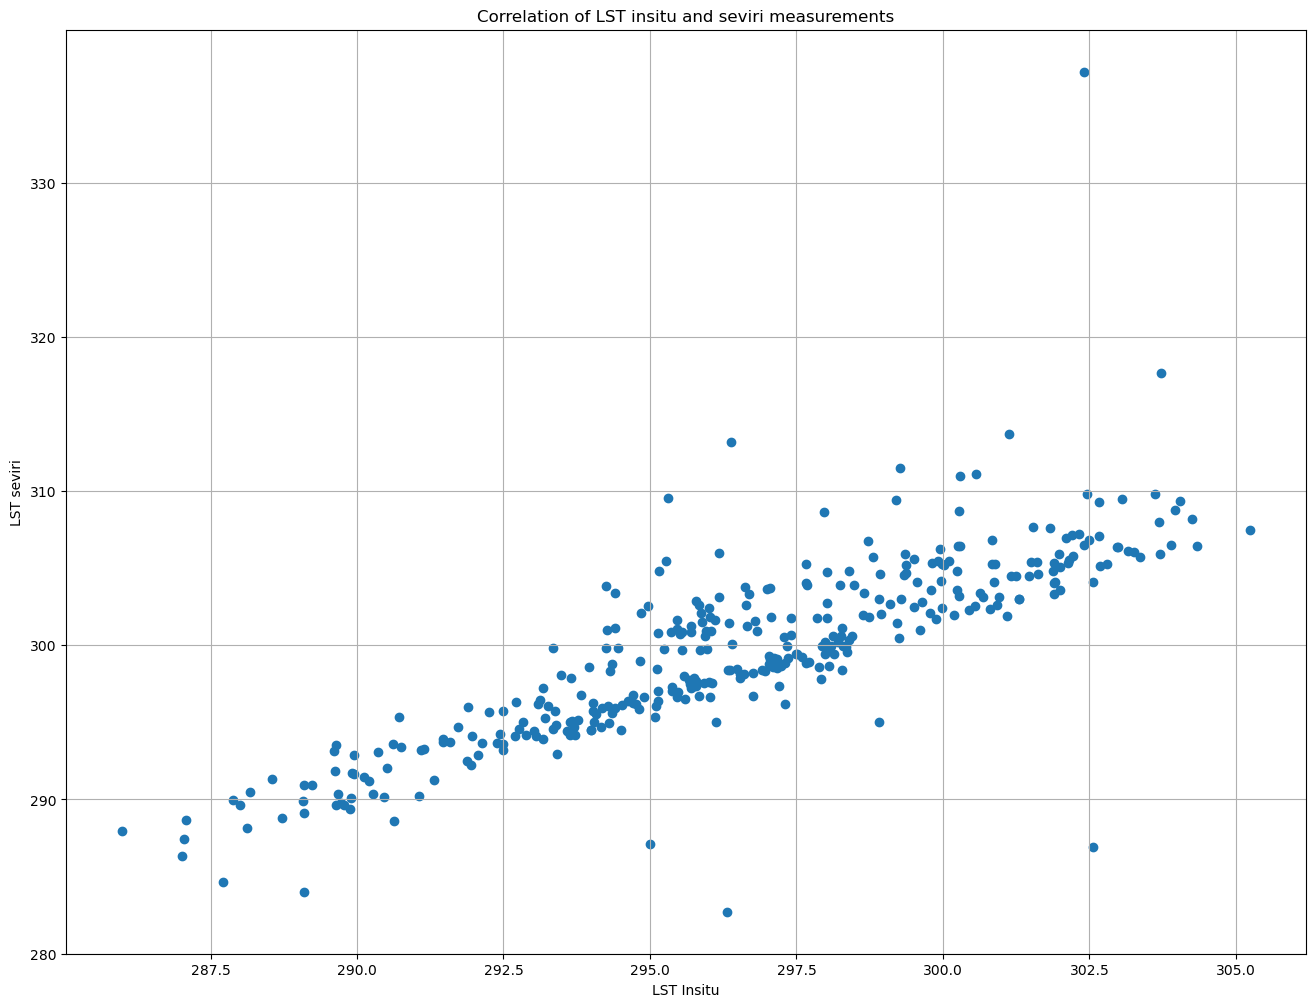

In [89]:
plt.figure(figsize=(16, 12))
plt.scatter(df_final.lst_insitu, df_final.lst_seviri, marker='o')
plt.xlabel('LST Insitu')
plt.ylabel('LST seviri')
plt.title('Correlation of LST insitu and seviri measurements')
plt.grid(True)
plt.show()


In [99]:

#define data
x = np.array(df_final['lst_insitu'])
y = np.array(df_final['lst_seviri'])

In [102]:

#find line of best fit
a, b = np.polyfit(x, y, 3)

LinAlgError: SVD did not converge in Linear Least Squares

In [100]:


#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

LinAlgError: SVD did not converge in Linear Least Squares

In [91]:
x = df_final.lst_insitu
y = df_final.lst_seviri

In [92]:
x.corr(y)                     # Pearson's r

0.8265907174633489

In [93]:
y.corr(x)

0.826590717463349

In [94]:
x.corr(y, method='spearman')  # Spearman's rho

0.8691188414984449

In [95]:
x.corr(y, method='kendall')   # Kendall's tau

0.7114413364413364

[Text(0.5, 0, 'lst_insitu'), Text(1.5, 0, 'lst_seviri')]

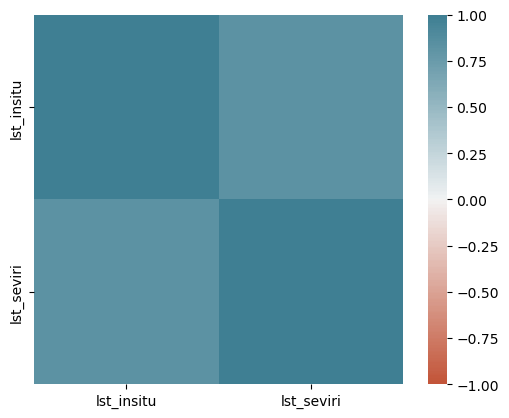

In [98]:
#data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')
import seaborn as sns
corr = df_final.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels())

In [79]:
# calculating pearson coefficient

my_rho = np.corrcoef(df_final)

print(my_rho)

[[ 1.  1.  1. ...  1. -1. nan]
 [ 1.  1.  1. ...  1. -1. nan]
 [ 1.  1.  1. ...  1. -1. nan]
 ...
 [ 1.  1.  1. ...  1. -1. nan]
 [-1. -1. -1. ... -1.  1. nan]
 [nan nan nan ... nan nan nan]]


plt.figure(figsize=(50, 6))
plt.plot(df_final.index, df_ins['lst_insitu'], marker='o')
plt.xlabel('Timestamp')
plt.ylabel('lst Value')
plt.title('Time Series Plot')
plt.grid(True)
#plt.tight_layout()
plt.show()

df_ins.rename(index={'Gregorian_Date': 'time'})

# plot 

fig, axs = plt.subplots(2, 1)
axs[0].plot(df_ins.index, df_sev['lst_seviri'], df_ins.index, df_ins['lst_insitu'])
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('seviri and insitu')
axs[0].grid(True)

#cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
#axs[1].set_ylabel('Coherence')

fig.tight_layout()
plt.show()

# filling missing dates
dt = pd.date_range(start='01-01-2020', end='31-12-2020')
idx = pd.DatetimeIndex(dt)
df_sev1 = df_sev.reindex(idx, columns=lst_seviri, axis=None, method=None, copy=None, level=None, fill_value=nan, limit=None, tolerance=None)[source]
)
df_sev1


In [144]:
df_sev1.to_csv('C:/Users/krthk/Downloads/ARSI/df_sev1.csv') 

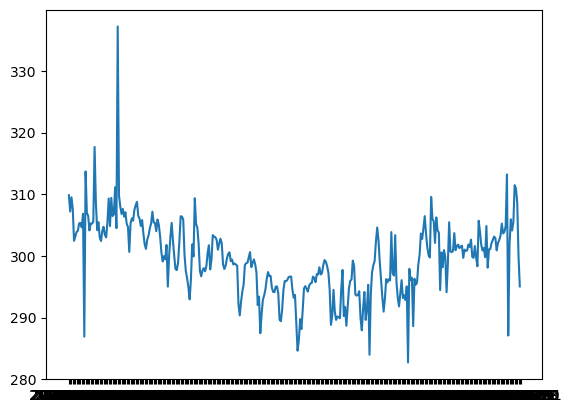

In [78]:
plt.plot(df_sev)
plt.show()

In [ ]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111)
ax.plot(time_sv, LST1_sv)